In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Acquisition

In [51]:
data = pd.read_csv('Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


price: harga rumah (target)

area = luas/m2

bedrooms = jumlah kamar tidur

bathrooms = jumlah kamar mandi

stories = jumlah APA

mainroad = menghadap jalan utama

guestroom = kamar tamu

basement = basement

hotwaterheating = pemanas air panas

airconditional = AC

parking = parkir

prefarea = prefarea

status perbaikan

### Exploratory Data Analysis

In [3]:
data.shape

(545, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [32]:
kategorikal = data.drop(columns=['price','area'])

In [34]:
kategorikal.columns

Index(['bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')

In [5]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [38]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_19520\3964116877.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=data.corr(), annot=True)


<AxesSubplot: >

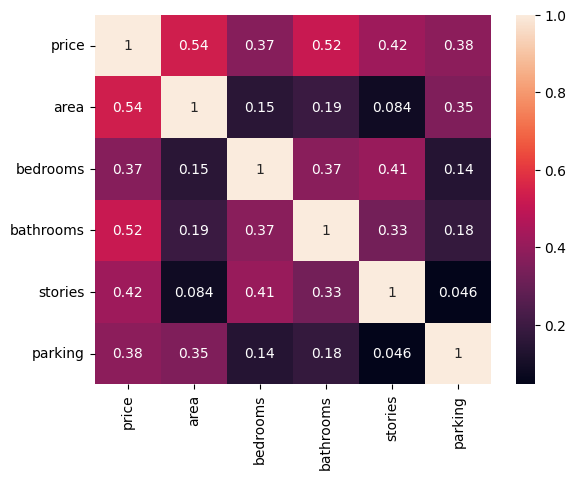

In [7]:
sns.heatmap(data=data.corr(), annot=True)

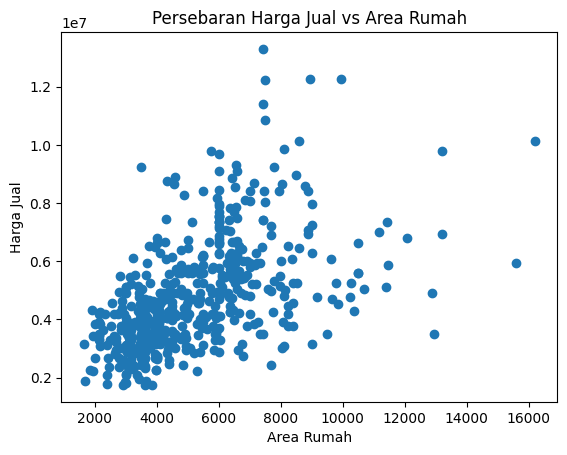

In [11]:
plt.scatter(data['area'], data['price'])
plt.title('Persebaran Harga Jual vs Area Rumah')
plt.xlabel('Area Rumah')
plt.ylabel('Harga Jual')
plt.show()

In [35]:
for column in kategorikal:
    value_counts = kategorikal[column].value_counts()
    print(f'Value Counts for column {column}:')
    print(value_counts)
    print('\n')

Value Counts for column bedrooms:
3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64


Value Counts for column bathrooms:
1    401
2    133
3     10
4      1
Name: bathrooms, dtype: int64


Value Counts for column stories:
2    238
1    227
4     41
3     39
Name: stories, dtype: int64


Value Counts for column mainroad:
yes    468
no      77
Name: mainroad, dtype: int64


Value Counts for column guestroom:
no     448
yes     97
Name: guestroom, dtype: int64


Value Counts for column basement:
no     354
yes    191
Name: basement, dtype: int64


Value Counts for column hotwaterheating:
no     520
yes     25
Name: hotwaterheating, dtype: int64


Value Counts for column airconditioning:
no     373
yes    172
Name: airconditioning, dtype: int64


Value Counts for column parking:
0    299
1    126
2    108
3     12
Name: parking, dtype: int64


Value Counts for column prefarea:
no     417
yes    128
Name: prefarea, dtype: int64


Value Counts for column furn

<AxesSubplot: >

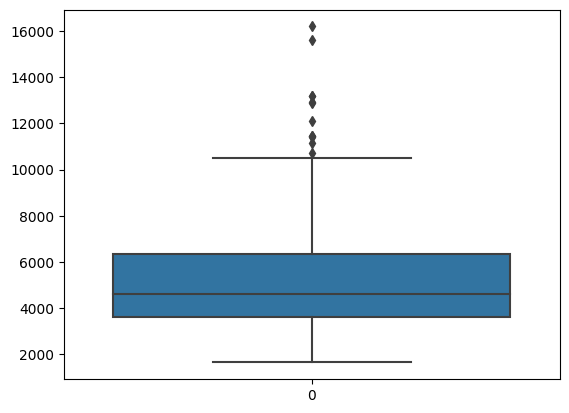

In [36]:
sns.boxplot(data=data['area'])

<AxesSubplot: >

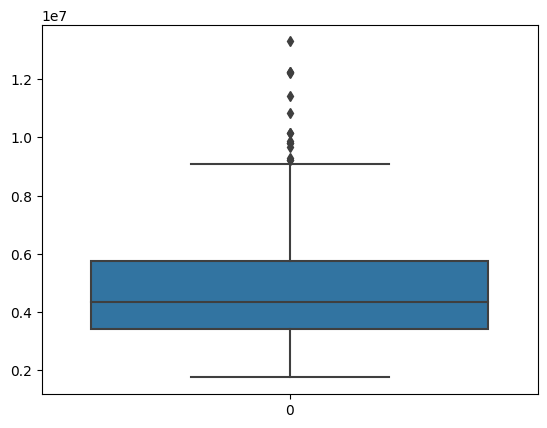

In [37]:
sns.boxplot(data=data['price'])

### Data Perprocessing

In [58]:
q1 = np.percentile(data['price'], 25)
q3 = np.percentile(data['price'], 75)
iqr = q3 - q1
lower_bound_price = q1 - (1.5 * iqr) 
upper_bound_price = q3 + (1.5 * iqr)

outliers_price = data[(data['price'] < lower_bound_price) | (data['price'] > upper_bound_price)]
jumlah_outliers_price = len(outliers_price)
print(jumlah_outliers_price)

15


In [59]:
q1 = np.percentile(data['area'], 25)
q3 = np.percentile(data['area'], 75)
iqr = q3 - q1
lower_bound_area = q1 - (1.5 * iqr) 
upper_bound_area = q3 + (1.5 * iqr)

outliers_price = data[(data['area'] < lower_bound_area) | (data['area'] > upper_bound_area)]
jumlah_outliers_price = len(outliers_price)
print(jumlah_outliers_price)

12


In [60]:
data = data.drop(data[(data['area'] < lower_bound_area) | (data['area'] > upper_bound_area)].index)
data = data.drop(data[(data['price'] < lower_bound_price) | (data['price'] > upper_bound_price)].index)

In [61]:
data.shape

(520, 13)

### Encoding Data

In [64]:
from sklearn.preprocessing import LabelEncoder
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished


In [65]:
le = [LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder()]

data['mainroad'] = le[0].fit_transform(data['mainroad'])
data['guestroom'] = le[1].fit_transform(data['guestroom'])
data['basement'] = le[2].fit_transform(data['basement'])
data['hotwaterheating'] = le[3].fit_transform(data['hotwaterheating'])
data['airconditioning'] = le[4].fit_transform(data['airconditioning'])
data['prefarea'] = le[5].fit_transform(data['prefarea'])
data['furnishingstatus'] = le[6].fit_transform(data['furnishingstatus'])

In [66]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,2
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1


### Transformasi Data

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
scaler = MinMaxScaler()
kolom_scaler = ['area', 'price'] 
data[kolom_scaler] = scaler.fit_transform(data[kolom_scaler])
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,1.000000,0.491525,4,1,2,1,0,1,0,0,2,0,1
16,1.000000,0.559322,4,2,2,1,1,1,0,1,1,1,2
17,0.980952,0.774011,3,2,4,1,0,0,0,1,2,0,0
18,0.971429,0.333333,3,2,2,1,1,0,0,1,2,0,0
19,0.966667,0.538983,3,2,2,1,0,0,0,1,1,1,1


### Pre-Modelling

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [70]:
x = data.drop(columns='price')
y = data['price']

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,random_state=42)

In [72]:
x_train.shape, x_test.shape

((364, 12), (156, 12))

In [74]:
model = LinearRegression()
parameters = {'normalize': [True, False], 'fit_intercept': [True, False]}
grid_search = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train, y_train)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             scoring='neg_mean_squared_error')

In [75]:
print("Parameter terbaik:", grid_search.best_params_)
print("Skor terbaik:", -grid_search.best_score_)

Parameter terbaik: {'fit_intercept': True, 'normalize': True}
Skor terbaik: 0.01715418167165176


In [76]:
modelLN = LinearRegression(normalize=True, fit_intercept=True)
modelLN.fit(x_train,y_train)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [77]:
y_pred = modelLN.predict(x_test)

In [78]:
mse = mean_squared_error(y_test, y_pred)
print(f'Nilai MSE: {mse}')

Nilai MSE: 0.01739803499979857


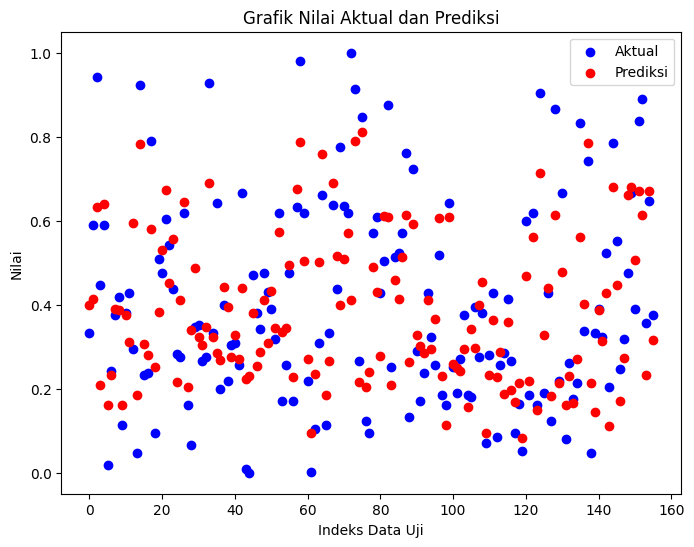

In [79]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Aktual')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Prediksi')

plt.title('Grafik Nilai Aktual dan Prediksi')
plt.xlabel('Indeks Data Uji')
plt.ylabel('Nilai')

plt.legend()
plt.show()